<h1 style="text-align: center;">
    Numerical Methods : <br>
    Rate equations or MC approaches for modelling growth <br>
    - Task 4 Report -
</h1>
<p style="text-align: center;">
Léo BECHET, M2 CompuPhys 2024-2025
</p>

# Task 4


### Rate Equations :

#### 1. **Monomer A**:
$\frac{d[A]}{dt} = F - k_{AB} [A][B] - k_{AA} [A]^2 - k_{AC} [A][C]$

#### 2. **Monomer B**:
$\frac{d[B]}{dt} = F - k_{AB} [A][B] - k_{AA} [B]^2 - k_{BC} [B][C]$

#### 3. **Monomer C**:
$\frac{d[C]}{dt} = k_{AB} [A][B] - k_{AC} [A][C] - k_{BC} [B][C]$

Where $k_{ij}$ is the rate constant for the reaction between $i$ and $j$. This determines how fast $i$ and $j$ react when they are adjacent.

1. **Deposition**: The species A and B are deposited on the surface at a constant rate $F$, which increases their concentrations.
   
2. **Reactions**: 
   - $k_{AB} [A][B] $: When A and B monomers are adjacent, they react to form C, decreasing the concentrations of A and B, and increasing the concentration of C.
   
3. **Dimerization**: 
   - $ k_{AA} [A]^2$ and $ k_{AA} [B]^2$: A and B form dimers with themselves (AA and BB dimers), which removes A and B from the monomer pool.
   - $ k_{AC} [A][C]$ and $ k_{BC} [B][C] $: A and B also form dimers with C (AC and BC dimers), removing A, B, and C from the reactive monomers.

These equations model the interplay between deposition, reaction, and irreversible dimer formation in the system.

In [3]:
# from task2and3 import Simulation, Monomer ; _IS_PARALLEL = False# Without numba
from task4_parallel import Simulation ; _IS_PARALLEL = True# With numba





from matplotlib.colors import ListedColormap
import os
import time
import numpy as np
import matplotlib.pyplot as plt

def RunForNdif(Ndif_A, Ndif_B, steps=40000, size=(100,100), coverage_limit=0.02):
    island_cellEvo = []
    island_numEvo = []
    monomer_numEvo = []

    # size = (100, 100)
    sim = Simulation(size, 0.5)

    # steps = 40000
    # Ndif_A = 50
    # coverage_limit = 0.2 # stop limiter


    sim_cells = size[0]*size[1]
    i=0
    while True:
        i+=1
        # deposit a monomer every n steps
        if i%Ndif_A == 0:
            sim.Deposit("A")

        if i%Ndif_B == 0:
            sim.Deposit("B")

        sim.Step() # step

        # Compute average number of cells per island
        isl, cells = sim.NumIslands()
        island_numEvo.append(isl)
        num_mono = sim.NumMonomers()
        monomer_numEvo.append(num_mono)


        try:
            island_cellEvo.append( sum(cells)/len(cells) )
        except ZeroDivisionError:
            island_cellEvo.append( 0 )

        # print("==========================================================")
        fill_ratio = (sum(cells)+num_mono)/sim_cells # < Replaced below when not using parallel as the DFS implementation is bugged.
        fill_ratio = (sum(cells))/sim_cells # < Replaced below when not using parallel as the DFS implementation is bugged.
        # =========== DEBUG ARRAY FILL RATIO =================
        if not _IS_PARALLEL:
            new_array = np.array([[1 if isinstance(cell, Monomer) else 0 for cell in row] for row in sim.grid])
            fill_ratio = np.sum(new_array.flatten())/sim_cells


        # ====================================================

        if i%1000 == 0:os.system("clear");print(f'SIM {i}\t{fill_ratio*100}%')

        #Stop condition due to coverage limit, here we take aggregated coverage
        if fill_ratio >= coverage_limit:
            print('Reached 20% fill')
            break




    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))





    # Grid for print
    # Initialize a new array with the same shape
    new_array = np.zeros(sim.grid.shape, dtype=int)

    # Set values based on conditions
    new_array[sim.grid == 0] = 0
    new_array[sim.grid == 1] = 1
    new_array[sim.grid == 2] = 2
    new_array[sim.grid == 3] = 3
    new_array[sim.grid == 11] = 4
    new_array[sim.grid == 12] = 5
    new_array[sim.grid == 13] = 6

    if _IS_PARALLEL: cbar = ax1.imshow(new_array, cmap='brg')


    ax1.set_title(f'Evolution for Ndif = {Ndif_A}')
    ax1.axis('off')  # Hide the axis

    # Plot the graphs on the right
    ax2.plot(monomer_numEvo, label="number of monomers")
    ax2.plot(island_numEvo, label="number of islands")
    ax2.plot(island_cellEvo, label="avg cells per islands")
    ax2.set_title('Graph of Evolution')
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


    return sim


Sim v 0.2 (Numba Parallelized)
SIM 1000	0.0%
SIM 2000	0.0%
SIM 3000	0.0%
SIM 4000	0.0%
SIM 5000	0.0%
SIM 6000	0.0%
SIM 7000	0.0%
SIM 8000	0.0%
SIM 9000	0.0%
SIM 10000	0.02%
SIM 11000	0.02%
SIM 12000	0.02%
SIM 13000	0.02%
SIM 14000	0.02%
SIM 15000	0.02%
SIM 16000	0.02%
SIM 17000	0.02%
SIM 18000	0.02%
SIM 19000	0.02%
SIM 20000	0.02%
SIM 21000	0.02%
SIM 22000	0.04%
SIM 23000	0.06%
SIM 24000	0.06%
SIM 25000	0.06%
SIM 26000	0.06%
SIM 27000	0.06%
SIM 28000	0.06%
SIM 29000	0.08%
SIM 30000	0.08%
SIM 31000	0.08%
SIM 32000	0.08%
SIM 33000	0.08%
SIM 34000	0.08%
SIM 35000	0.08%
SIM 36000	0.08%
SIM 37000	0.08%
SIM 38000	0.1%
SIM 39000	0.1%
SIM 40000	0.1%
SIM 41000	0.1%
SIM 42000	0.12%
SIM 43000	0.12%
SIM 44000	0.12%
SIM 45000	0.12%
SIM 46000	0.13999999999999999%
SIM 47000	0.13999999999999999%
SIM 48000	0.13999999999999999%
SIM 49000	0.13999999999999999%
SIM 50000	0.13999999999999999%
SIM 51000	0.13999999999999999%
SIM 52000	0.13999999999999999%
SIM 53000	0.13999999999999999%
SIM 54000	0.13999999999

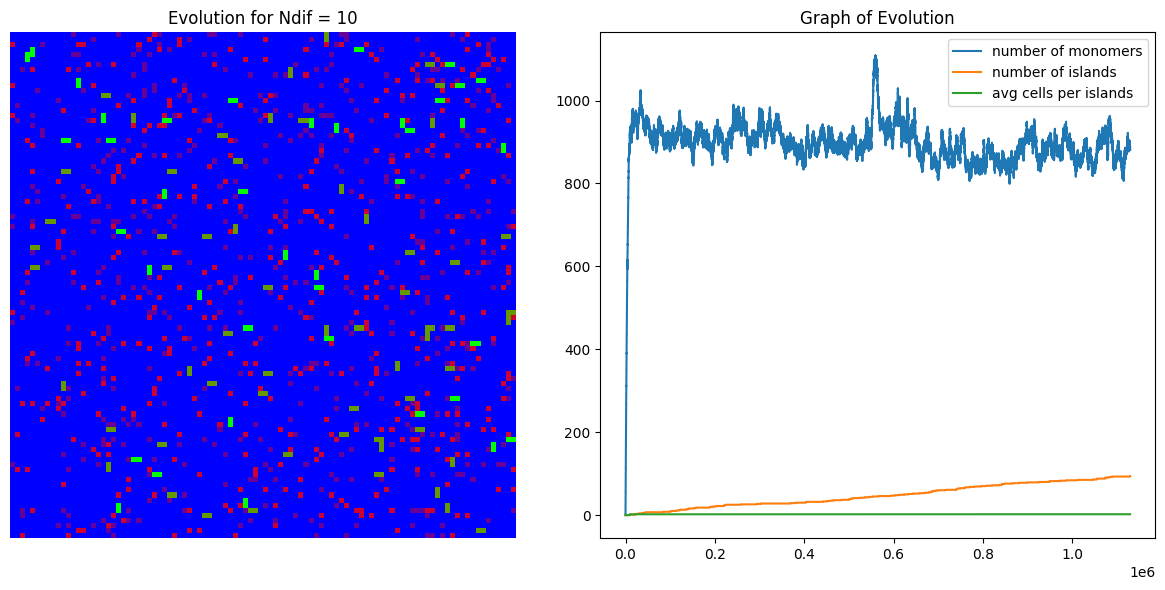

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]]


In [4]:
s = RunForNdif(10, 12)
print(s.grid)


In [5]:
num = 0
for i in range(len(s.grid)):
    for j in range(len(s.grid[0])):
        if s.grid[i,j]==3 or s.grid[i,j]==13:
            num += 0

print(num)

0


We can spot issues in the new simulation. No C molecules are present, whether aggregated or not. We are sadly not sure why, and couldn't figure out the reason of this. The update for cells is described below :

```PYTHON
    size = grid.shape
    if grid[i, j] in (1, 2, 3):  # Check if the cell is non-aggregated A, B, or C
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Check neighbors
            ni, nj = i + di, j + dj
            if 0 <= ni < size[0] and 0 <= nj < size[1]:

                if grid[ni, nj] == 0:  # Skip if the neighbor is empty
                    continue

                # If A and B are adjacent, form a C molecule
                elif (grid[i, j] == 1 and grid[ni, nj] == 2) or (grid[i, j] == 2 and grid[ni, nj] == 1):
                    # Reset both cells
                    grid[i, j] = 0
                    grid[ni, nj] = 0

                    # Create a C molecule at random between the two cells
                    if np.random.rand() > 0.5:
                        grid[i, j] = 3  # C molecule
                    else:
                        grid[ni, nj] = 3  # C molecule
                    return

                # For all aggregation scenarios: A-A, B-B, C-C, A-C, B-C, aggregate both
                elif (grid[i, j] in (1, 2, 3) and grid[ni, nj] in (1, 2, 3)):
                    # Aggregating the cells
                    grid[i, j] += 10  # Convert current to aggregated form
                    if grid[ni, nj]<=10: grid[ni, nj] += 10  # Convert neighbor to aggregated form if not already
                    return  # After aggregation, we exit since it’s handled
```